In [10]:
import pandas as pd
from data.market_data import OKXDataFetcher
from core.context import BacktestContext
from core.strategy_registry import StrategyRegistry
from backtest.backtest_engine import BacktestEngine
from backtest.performance_metrics import analyze_performance
from execution.trade_logger import TradeLogger
from risk_management.risk_checker import RiskChecker
from utils.plots import plot_pnl_curve, plot_signals_on_price
from backtest.reporter import generate_markdown_report
from core.strategy_loader import load_all_strategies
import warnings

warnings.filterwarnings("ignore")

load_all_strategies()

ImportError: cannot import name 'ConfigLoader' from 'utils.config_loader' (C:\Users\tzhang\PycharmProjects\TaoTrader\utils\config_loader.py)

In [2]:
print("Starting backtest run...")
# 1. 获取K线数据
fetcher = OKXDataFetcher()
df = fetcher.get_kline('BTC-USDT-SWAP', bar='1H')
print(f"Fetched {len(df)} rows of K-line data.")


In [3]:
# 2. 加载配置
ctx = BacktestContext(
    strategy_config_path='configs/strategy/ma_crossover.yaml',
    backtest_config_path='configs/backtest.yaml',
    risk_config_path='configs/risk.yaml'
)
print("Loaded backtest context with strategy, backtest, and risk config.")

In [4]:
# 3. 加载策略类
strategy_cls = StrategyRegistry.get("MA_Crossover")
print(f"Loaded strategy class: {strategy_cls.__name__}")

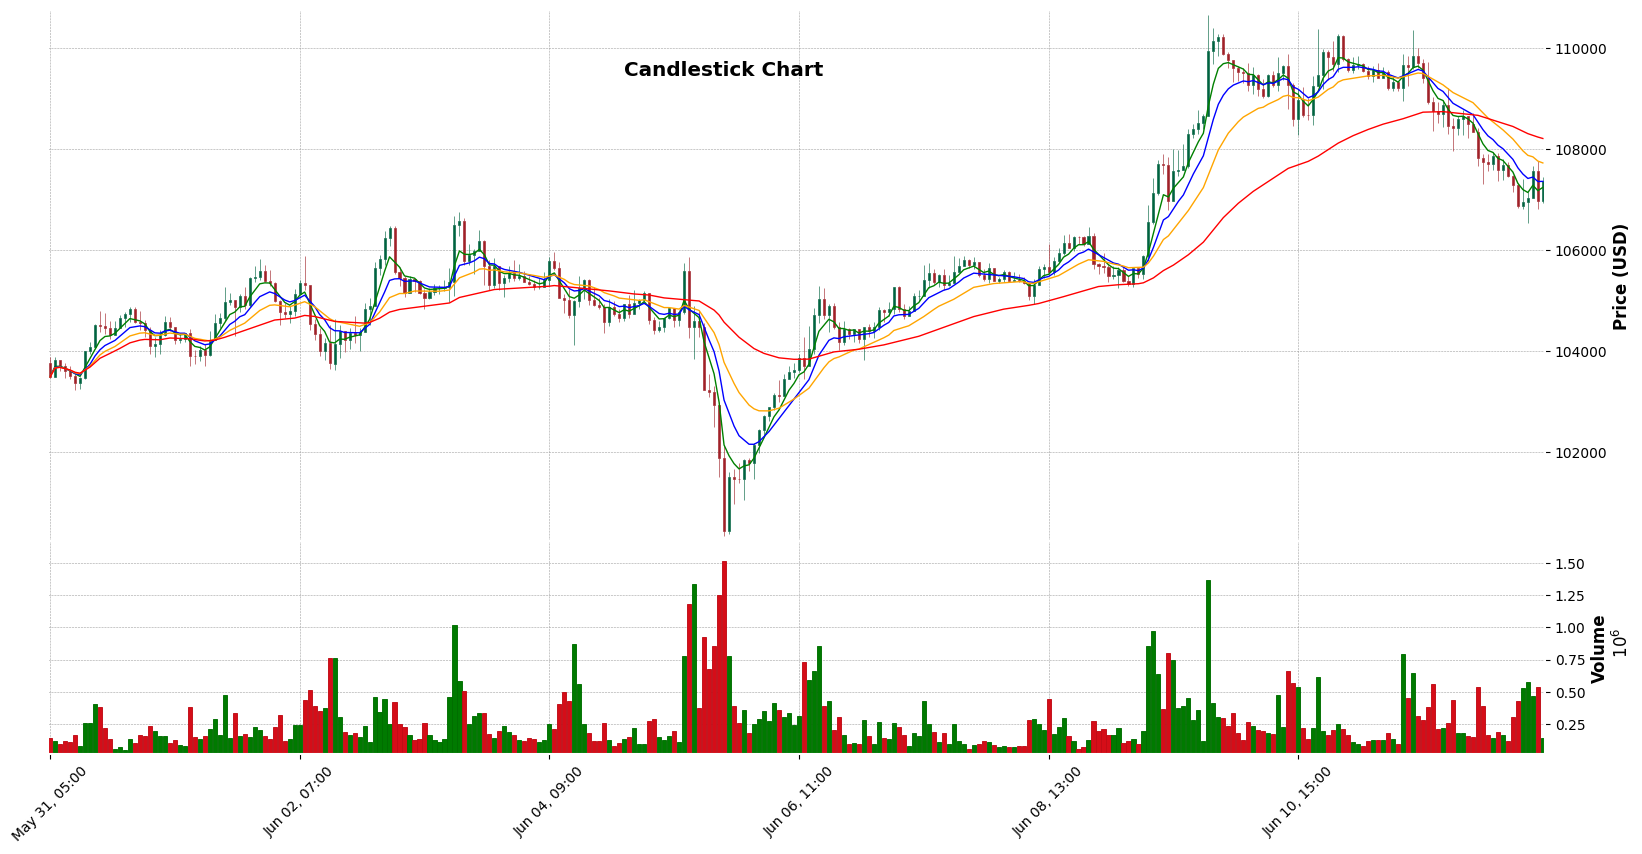

In [5]:
# 4. 初始化日志和风控
trade_logger = TradeLogger()
risk_checker = RiskChecker(ctx)
print("Initialized trade logger and risk checker.")

In [6]:
# 5. 初始化并运行回测
engine = BacktestEngine(
    strategy_class=strategy_cls,
    data=df,
    context=ctx,
    trade_logger=trade_logger,
    risk_checker=risk_checker
)
print("Backtest engine initialized. Starting engine run...")
engine.run()
unrealized = engine.get_unrealized()

In [7]:
df_signal

,timestamp,open,high,low,close,volume,entry_signal,EMA20,exit_signal_1,exit_signal_2,exit_signal_3,exit_signal,avg_volume
0,2025-05-31 05:00:00,103769.4,103873.7,103469.0,103487.0,144595.60,False,103487.000000,False,False,False,False,NaN
1,2025-05-31 06:00:00,103487.0,103877.0,103481.9,103829.8,118926.48,False,103666.970000,False,False,False,False,NaN
2,2025-05-31 07:00:00,103829.7,103829.8,103600.0,103703.3,97051.27,False,103680.310158,False,False,False,False,NaN
3,2025-05-31 08:00:00,103703.4,103771.3,103468.0,103606.4,120960.92,False,103658.973438,False,False,False,False,NaN
4,2025-05-31 09:00:00,103606.3,103700.9,103437.9,103500.4,112699.76,False,103620.615873,False,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2025-06-12 12:00:00,106868.2,107394.0,106800.0,106946.9,532320.95,False,107959.826154,False,False,False,False,284714.8255
296,2025-06-12 13:00:00,106947.0,107150.0,106533.0,107020.4,577975.55,False,107870.356996,False,False,False,False,294677.5165
297,2025-06-12 14:00:00,107020.4,107666.7,107020.3,107562.3,468177.91,False,107841.018235,False,False,False,False,290216.5150
298,2025-06-12 15:00:00,107562.3,107755.4,106800.0,106960.0,540832.79,False,107757.111736,False,False,False,False,306713.8520


ValueError: zero-size array to reduction operation maximum which has no identity

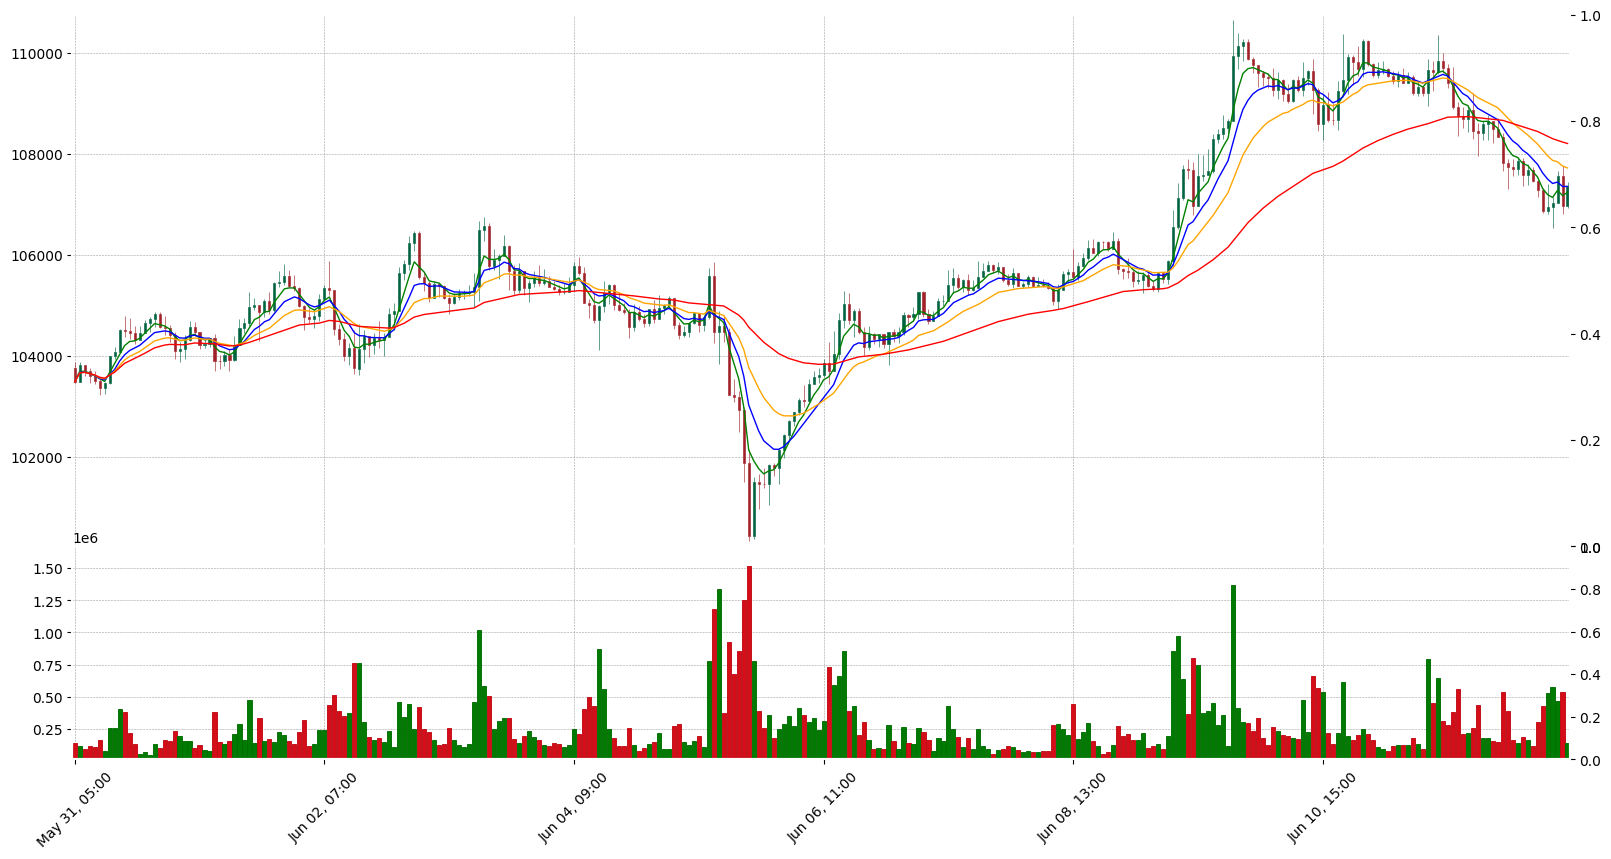

In [8]:









# 6. 分析绩效
trades_df = trade_logger.to_dataframe()
perf = analyze_performance(trades_df, unrealized=unrealized)
print("Performance analysis complete.")


=== Performance Summary ===
Final Capital: $4879.39
Total Return: $-120.61
Max Drawdown: $5044.59
Trades Executed: 4
Win Rate: 0.00%


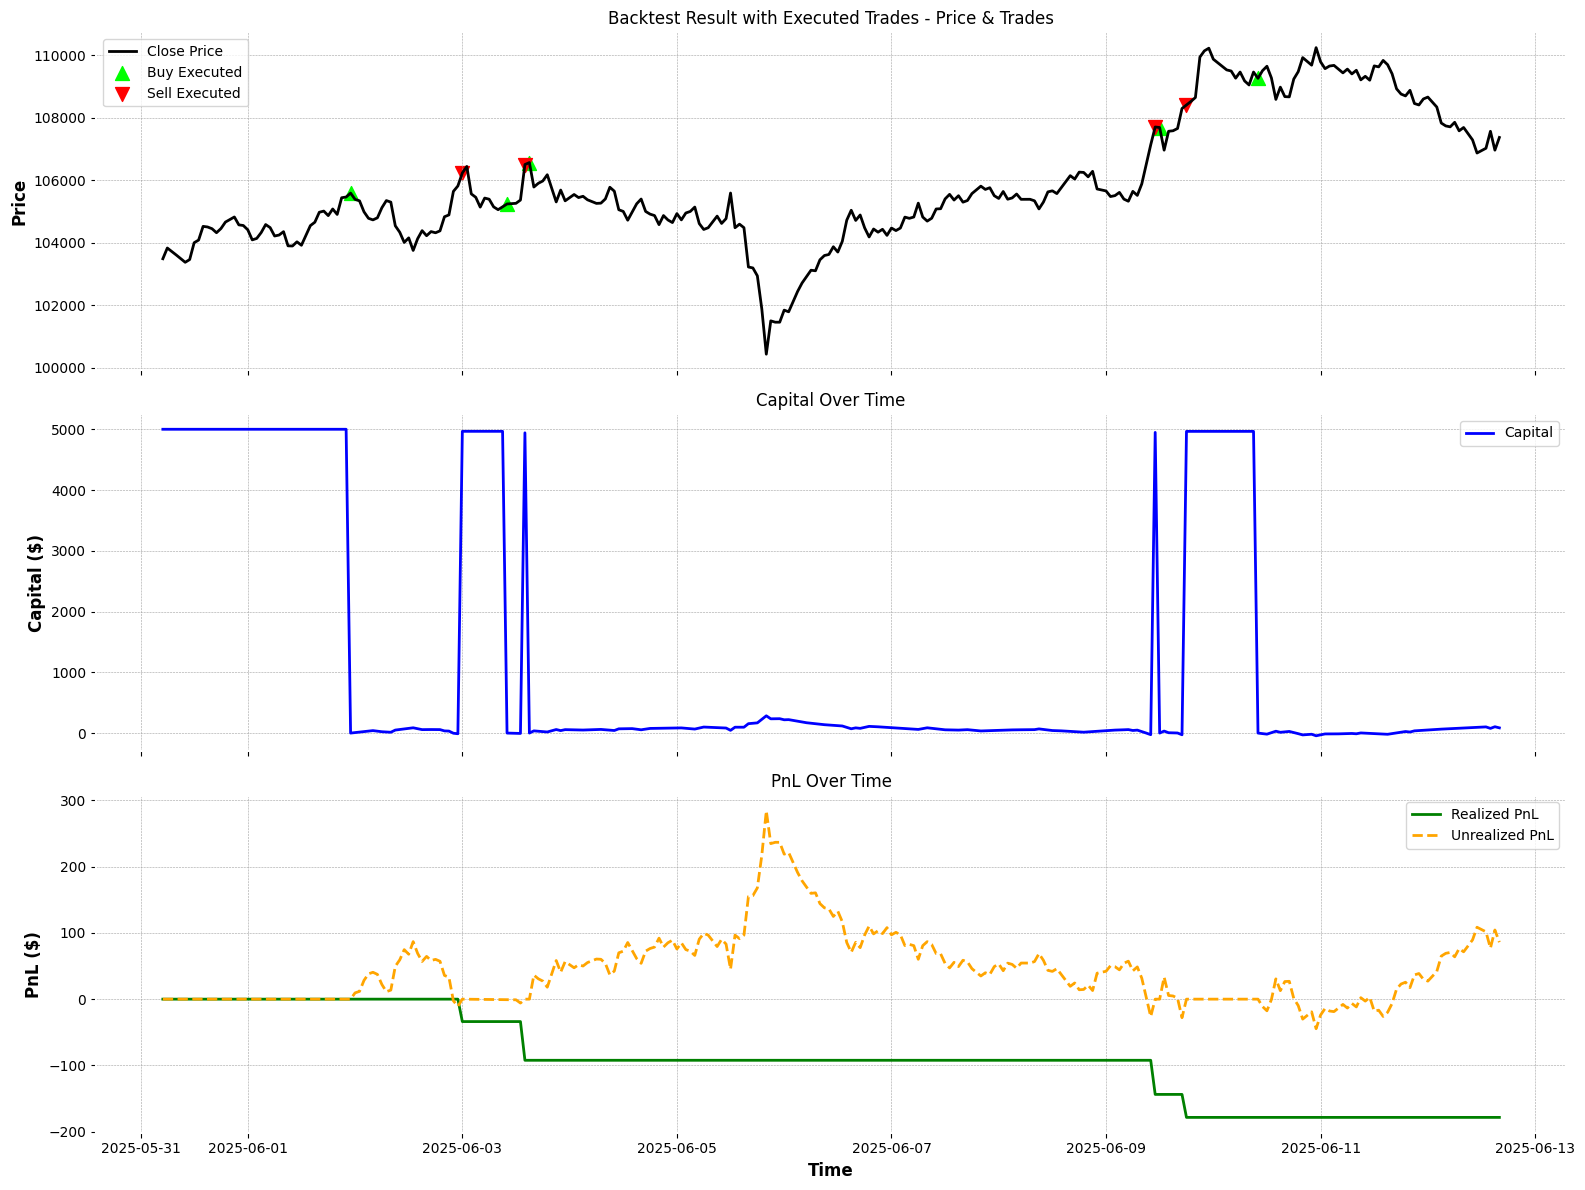

In [9]:
print("==== Performance Summary ====")
print(perf)

# 8. 可视化（买卖点、收益曲线）
if not trades_df.empty:
    plot_signals_on_price(df, trades_df)
    plot_pnl_curve(trades_df)
    print("Plotted signals and PnL curve.")
    generate_markdown_report(trades_df, perf, engine.get_unrealized())
    print("Generated Markdown performance report.")
    # generate_html_report(trades_df, perf)
else:
    logger.warning("No trades executed. Skipping plots and reports.")